In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# read dataset
df = pd.read_csv('_6Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66


In [4]:
df.shape

(10000, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Hours Studied                     10000 non-null  int64 
 1   Previous Scores                   10000 non-null  int64 
 2   Extracurricular Activities        10000 non-null  object
 3   Sleep Hours                       10000 non-null  int64 
 4   Sample Question Papers Practiced  10000 non-null  int64 
 5   Performance Index                 10000 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 468.9+ KB


In [6]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [7]:
df_num = df.select_dtypes(include=['int','float'])
df_num.head(3)

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91
1,4,82,4,2,65
2,8,51,7,2,45


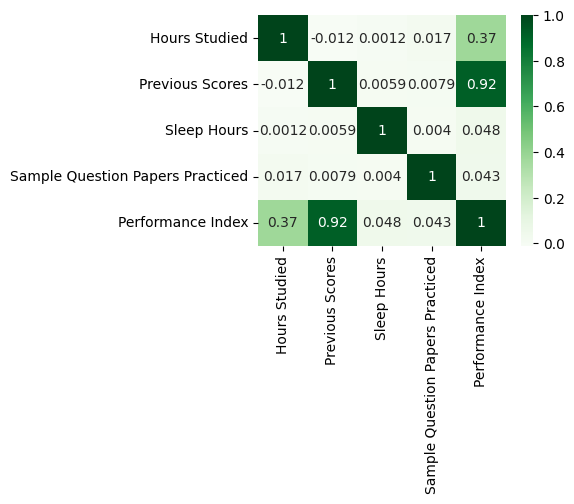

In [8]:
plt.figure(figsize=(4,3))
sns.heatmap(df_num.corr(), annot=True, cmap='Greens')
plt.show()

In [9]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(127)

In [11]:
df.dtypes

Hours Studied                        int64
Previous Scores                      int64
Extracurricular Activities          object
Sleep Hours                          int64
Sample Question Papers Practiced     int64
Performance Index                    int64
dtype: object

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(9873, 6)

In [14]:
x = df.drop('Performance Index', axis=1)
y = df['Performance Index']

## data visualizaion for better understanding

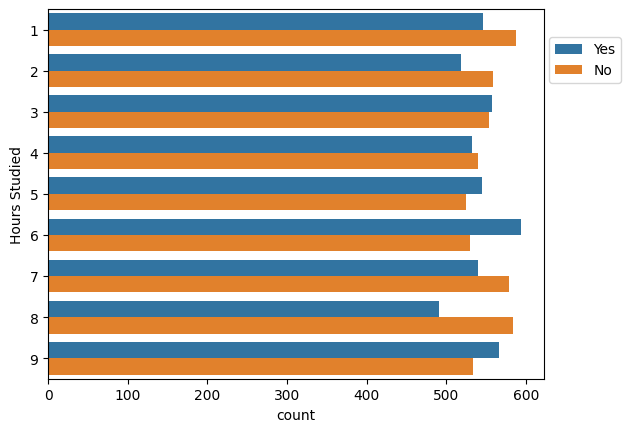

In [15]:
sns.countplot(y=df['Hours Studied'], hue=df['Extracurricular Activities'])
plt.legend(loc=(1.01,0.8))
plt.show()

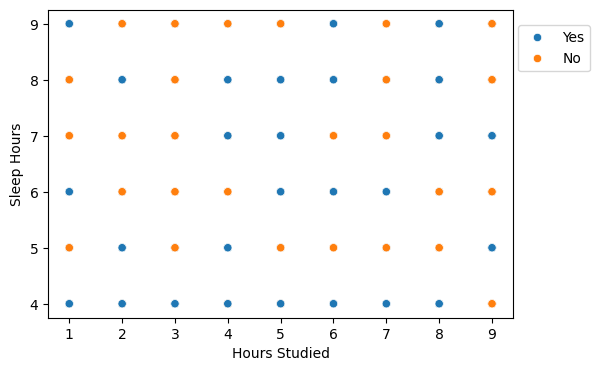

In [17]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['Hours Studied'], y=df['Sleep Hours'], hue=df['Extracurricular Activities'])
plt.legend(loc=(1.01,0.8))
plt.show()

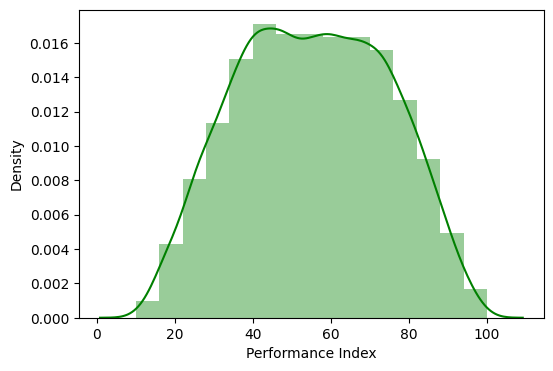

In [18]:
plt.figure(figsize=(6,4))
sns.distplot(df['Performance Index'],bins=15, kde=True, color='green')
plt.show()

In [19]:
hour_std = df['Hours Studied'].value_counts()
hour_std

Hours Studied
1    1133
6    1122
7    1118
3    1110
9    1099
2    1077
8    1074
4    1071
5    1069
Name: count, dtype: int64

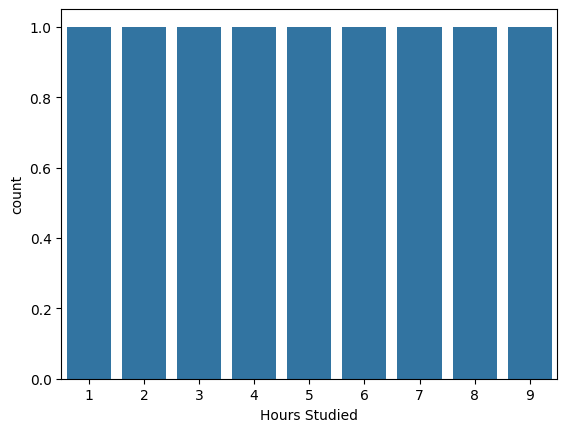

In [20]:
sns.countplot(hour_std)
plt.show()

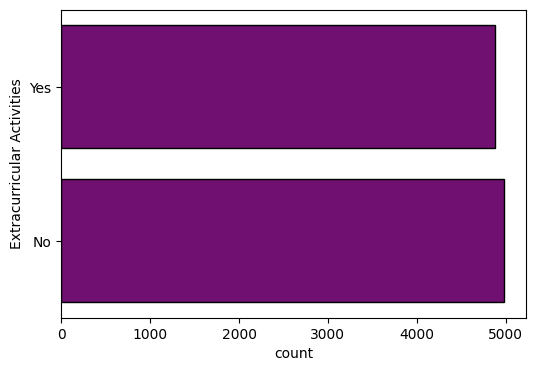

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(df['Extracurricular Activities'], color='purple', edgecolor='black')
plt.show()

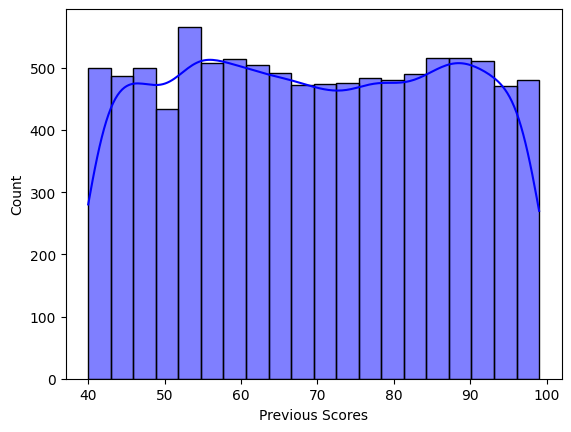

In [23]:
sns.histplot(df['Previous Scores'],bins=20, kde=True, color='blue')
plt.show()

In [24]:
# plot the performance index of all those students who were involved in extra curryculam 
ect = df.groupby('Extracurricular Activities').get_group('Yes')
ect.head(3)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36


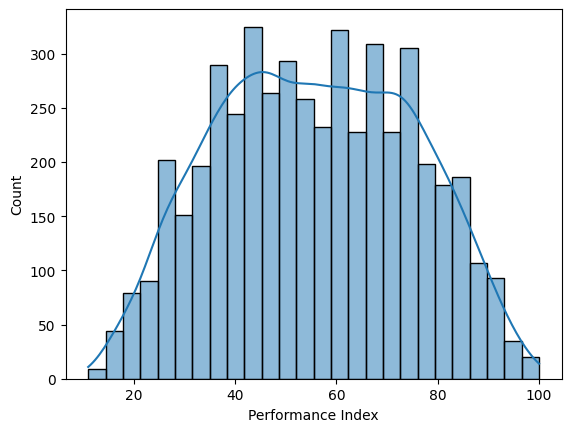

In [25]:
sns.histplot(ect['Performance Index'], kde=True)
plt.show()

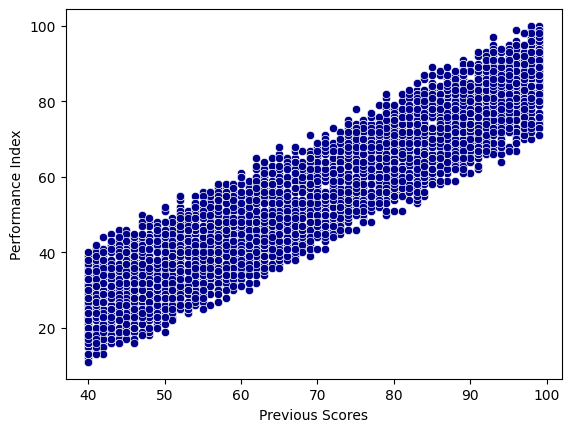

In [26]:
sns.scatterplot(x=ect['Previous Scores'], y=ect['Performance Index'], color='darkblue')
plt.show()

previous score and percormance index shows the positive correlation betweem them

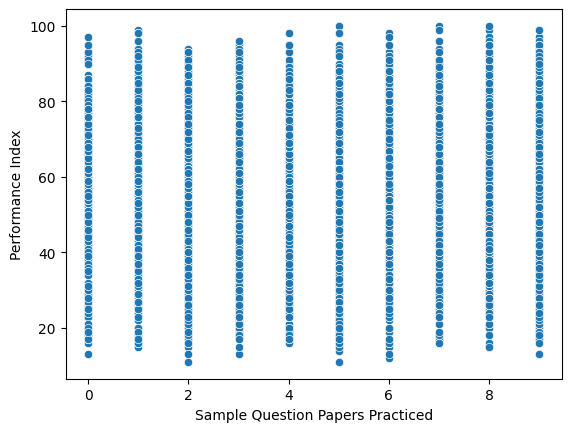

In [27]:
sns.scatterplot(x=ect['Sample Question Papers Practiced'], y=ect['Performance Index'])
plt.show()

In [28]:
ect_n = df.groupby('Extracurricular Activities').get_group('No')
ect_n.head(3)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
1,4,82,No,4,2,65
4,7,75,No,8,5,66
5,3,78,No,9,6,61


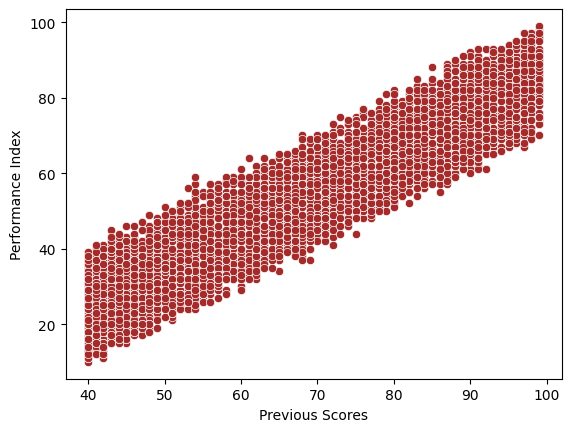

In [29]:
sns.scatterplot(x=ect_n['Previous Scores'], y=ect_n['Performance Index'], color='brown')
plt.show()

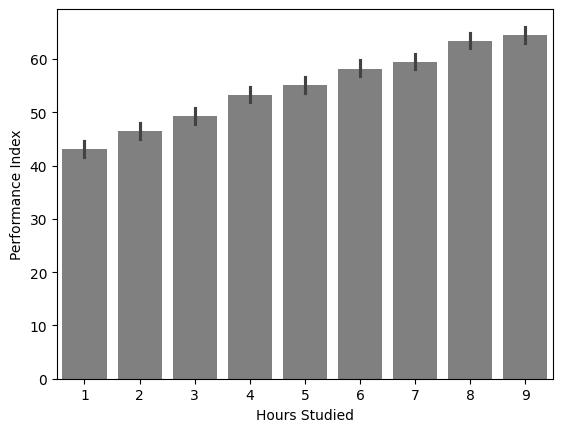

In [30]:
sns.barplot(x=ect_n['Hours Studied'], y=ect_n['Performance Index'], color='grey')
plt.show()

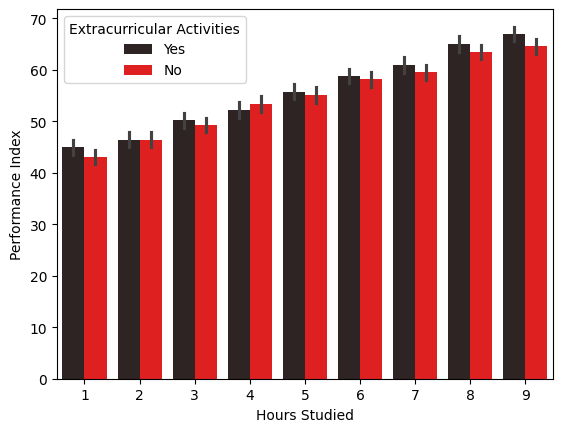

In [31]:
sns.barplot(x=df['Hours Studied'], y=df['Performance Index'], hue=df['Extracurricular Activities'], color='red')
plt.show()

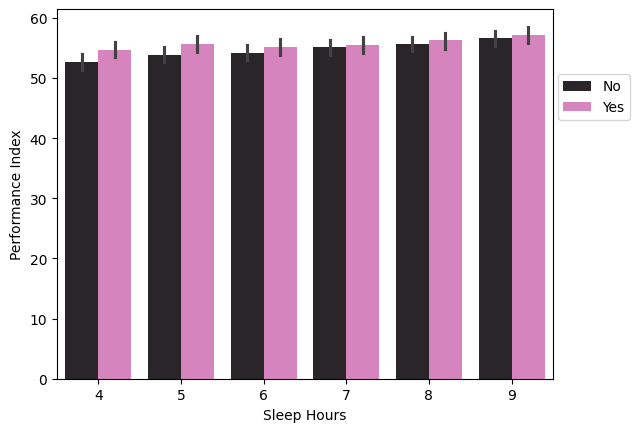

In [32]:
sns.barplot(x=df['Sleep Hours'], y=df['Performance Index'], hue=df['Extracurricular Activities'], color='C6')
plt.legend(loc=(1.01,0.7))
plt.show()

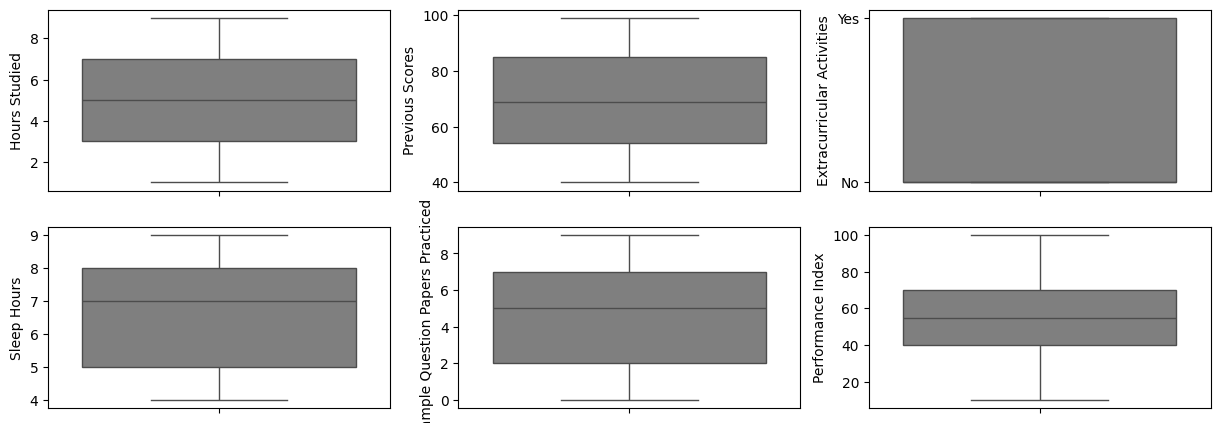

In [39]:
plt.figure(figsize=(15,8))
a = 1
for i in df.columns:
    plt.subplot(3,3,a)
    sns.boxplot(df[i], color='C7')
    a +=1
plt.show()

In [33]:
ex = df['Extracurricular Activities'].values.reshape(-1,1)
ex

array([['Yes'],
       ['No'],
       ['Yes'],
       ...,
       ['Yes'],
       ['Yes'],
       ['No']], dtype=object)

In [34]:
from sklearn.preprocessing import OneHotEncoder

In [35]:
encoder = OneHotEncoder()
encoded = encoder.fit_transform(ex)

In [36]:
encoder.categories_

[array(['No', 'Yes'], dtype=object)]

In [37]:
df[encoder.categories_[0]] = encoded.toarray().astype(int)

In [38]:
df.drop('Extracurricular Activities', axis=1, inplace=True)

In [39]:
df.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,No,Yes
0,7,99,9,1,91.0,0,1
1,4,82,4,2,65.0,1,0
2,8,51,7,2,45.0,0,1
3,5,52,5,2,36.0,0,1
4,7,75,8,5,66.0,1,0


In [40]:
x = df.drop('Performance Index', axis=1)
y = df['Performance Index']

In [41]:
x.head(3)

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,No,Yes
0,7,99,9,1,0,1
1,4,82,4,2,1,0
2,8,51,7,2,0,1


In [42]:
y.head(3)

0    91.0
1    65.0
2    45.0
Name: Performance Index, dtype: float64

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [45]:
x_train.shape, y_train.shape

((7898, 6), (7898,))

In [46]:
x_test.shape, y_test.shape

((1975, 6), (1975,))

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()
x_train_scl = scaler.fit_transform(x_train)
x_test_scl = scaler.transform(x_test)

In [49]:
x_train_scl[:3]

array([[ 0.00372078,  0.09653565, -1.49715301, -0.20890687,  0.99394087,
        -0.99394087],
       [-1.15628182, -0.71266303,  0.26840261, -1.25715748, -1.00609607,
         1.00609607],
       [-1.54294935, -1.17506228, -1.49715301, -1.60657435,  0.99394087,
        -0.99394087]])

In [50]:
x_test_scl[:3]

array([[-0.38294675, -0.30806369, -0.90863447,  0.14051   , -1.00609607,
         1.00609607],
       [ 0.77705585,  1.19473386, -1.49715301, -1.25715748, -1.00609607,
         1.00609607],
       [ 0.39038831,  0.21213546, -0.32011593, -1.25715748, -1.00609607,
         1.00609607]])

## Model building wiht Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lin_reg = LinearRegression()
lin_reg.fit(x_train_scl, y_train)

LinearRegression()

In [53]:
y_train_pred = lin_reg.predict(x_train_scl)
y_test_pred = lin_reg.predict(x_test_scl)

In [54]:
from sklearn.metrics import r2_score

In [55]:
print(f'Linear regression Train data r2_score : {round(r2_score(y_train, y_train_pred)*100,2)}')
print(f'Linear regression Test data r2_score : {round(r2_score(y_test, y_test_pred)*100,2)}')

Linear regression Train data r2_score : 98.87
Linear regression Test data r2_score : 98.84


In [ ]:
# save the model
with open("performance.pkl", "wb") as file:
    pickle.dump(lin_reg, file)

## Model building building with KNN

In [56]:
from sklearn.neighbors import KNeighborsRegressor

In [57]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train_scl, y_train)

KNeighborsRegressor()

In [58]:
y_train_pred_knn = knn.predict(x_train_scl)
y_test_pred_knn = knn.predict(x_test_scl)

In [59]:
print(f'KNN Train data r2_score : {round(r2_score(y_train, y_train_pred_knn)*100,2)}')
print(f'KNN Test data r2_score : {round(r2_score(y_test, y_test_pred_knn)*100,2)}')

KNN Train data r2_score : 98.38
KNN Test data r2_score : 97.65


## Model building with Decision Tree

In [61]:
from sklearn.tree import DecisionTreeRegressor

In [62]:
tree = DecisionTreeRegressor(max_depth=4)
tree.fit(x_train_scl, y_train)

DecisionTreeRegressor(max_depth=4)

In [63]:
y_train_pred_trr = tree.predict(x_train_scl)
y_test_pred_trr = tree.predict(x_test_scl)

In [64]:
print(f'Decision Train data r2_score : {round(r2_score(y_train, y_train_pred_trr)*100,2)}')
print(f'Decision Test data r2_score : {round(r2_score(y_test, y_test_pred_trr)*100,2)}')

Decision Train data r2_score : 93.7
Decision Test data r2_score : 93.47
